## Introduction

A Decision Tree is a tree-like structure that represents a set of decisions and their possible consequences. Each node in the tree represents a decision, and each branch represents the outcome of that decision. The leaves of the tree represent the final decisions or predictions.

Decision trees are created by recursively partitioning the data into smaller subsets. At each partition, the data is split based on a specific feature, and the split is made in a way that maximizes the **information gain** (or minimizes the **Gini impurity**, depending on the criterion used).

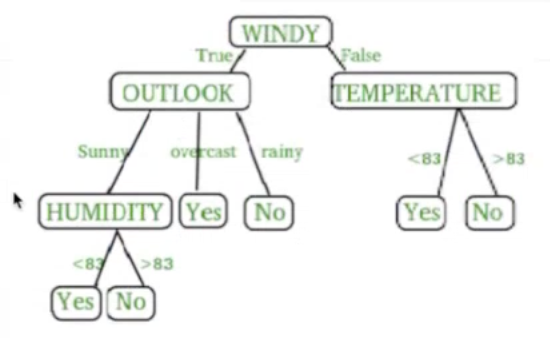


In the above figure, decision tree is a flowchart-like tree structure that is used to make decisions. It consists of Root Node(WINDY), Internal nodes(OUTLOOK, TEMPERATURE), which represent tests on attributes, and leaf nodes, which represent the final decisions. The branches of the tree represent the possible outcomes of the tests.

---

### Key Components of Decision Trees in Python

- **Root Node**: The decision tree's starting node, which represents the entire dataset.
- **Branch Nodes**: Internal nodes that represent decision points, where the data is split based on a specific attribute.
- **Leaf Nodes**: Terminal nodes that represent the final classification or prediction.
- **Decision Rules**: Rules that govern how data is split at each branch node. These are derived from the values of the features.
- **Attribute Selection**: The process of selecting the most informative attribute for each split. This is typically based on metrics such as **information gain** or the **Gini index**.
- **Splitting Criteria**: Metrics like **information gain**, **entropy**, or **Gini index** are used to determine the optimal split at each node.

---


### Assumptions when Using Decision Trees

- At the beginning, we consider the whole training set as the **root node**.
- Attributes are assumed to be **categorical** for calculating **information gain**, and **continuous** for calculating the **Gini index**.
- Records are recursively distributed based on the values of attributes.
- We use statistical methods for ordering attributes as root or internal node. These methods help in determining which feature provides the best split.

---

### Decision Tree Algorithm

The basic algorithm for building a decision tree is as follows:

1. **Start with the entire dataset** at the root node.
2. **For each feature**, calculate the **information gain** (or **Gini impurity reduction**) for each possible split.
3. **Select the feature** with the highest information gain (or lowest Gini impurity) to split on.
4. **Partition the data** according to the selected feature's values.
5. Repeat steps 2-4 **recursively** for each child node until one of the following conditions is met:
   - All instances in a node belong to the same class.
   - No remaining features to split on.
   - A predefined stopping condition is met (e.g., max depth, min samples per leaf, etc.).


## Key Concepts in Decision Trees
### 1.⁠ ⁠Entropy
Entropy is a measure of impurity or uncertainty in a dataset. In the context of decision trees, it quantifies how mixed the classes are in a particular node.

Example:
- If we have a binary classification with 50% positive and 50% negative examples -> Max entropy
- ⁠If all examples belong to one class --> 0 entropy

---

### 2. Information Gain

Information gain is the reduction in entropy achieved by partitioning the data according to a particular feature. Decision trees use information gain to select the best feature to split on at each step.

---

### 3. Gini Impurity

An alternative to entropy is **Gini impurity**, which measures the probability of misclassifying a randomly chosen element if it were labeled randomly according to the class distribution.

---

### Random Forests

Random Forests are an **ensemble learning method** that builds multiple decision trees and combines their predictions to improve generalization and reduce overfitting.

---

#### Key Concepts in Random Forests

1. **Bagging (Bootstrap Aggregating)**
   - Each tree in the forest is trained on a random subset of the training data (sampled **with replacement**).
   - This introduces diversity among the trees and reduces variance.

2. **Random Feature Selection**
   - At each split, only a random subset of features is considered for finding the best split.
   - This further introduces randomness and helps in decorrelating the trees.

3. **Voting / Averaging Predictions**
   - For **classification**: the majority vote of all trees is used to make the final prediction.
   - For **regression**: the average of all tree predictions is used to make the final prediction.

---

#### Hyperparameters in Random Forests

Key hyperparameters to tune:

- `n_estimators`: Number of trees in the forest.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split`: Minimum number of samples required to split a node.
- `min_samples_leaf`: Minimum number of samples required at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.
- `bootstrap`: Whether bootstrap samples are used when building trees (defaults to `True`).


In [13]:
import pandas as pd
import matplotlib.pyplot as pyplot

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


In [14]:
df = pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [15]:
#Basic preprocessing
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']] 
df.dropna(inplace=True)

#encoding categorical values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

X = df.drop('Survived', axis=1)
y=df['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report: /n", classification_report(y_test, y_pred))

Accuracy: 0.7902097902097902
Classification report: /n               precision    recall  f1-score   support

           0       0.81      0.85      0.83        87
           1       0.75      0.70      0.72        56

    accuracy                           0.79       143
   macro avg       0.78      0.77      0.78       143
weighted avg       0.79      0.79      0.79       143



In [19]:
sample = {
    'Pclass': 3,
    'Sex': 'male',
    'Age': 22.0,
    'SibSp': 1,
    'Parch': 0,
    'Fare': 7.25,
    'Embarked': 'S'
}

sample 

NameError: name 'confusion_matix' is not defined